In [1]:
from matplotlib import pyplot as plt

import numpy as np

import chapt_4_car_renting as cr


In [2]:
%load_ext autoreload
%autoreload 2

# Create Environment

In [3]:
environment = cr.Environment()

# 1. Calculate Environment

## Calculate State-Action-NextS-State Probability Distributions

In [ ]:
state_action_probability_distributions = environment.calculate_all_state_action_next_state_probability_distributions()

In [6]:
state_action_probability_distributions.shape

(441, 11, 441)

In [ ]:
cr.Environment.save(state_action_probability_distributions, "state_action_probability_distributions.joblib")

## Calculate State Action Expected Rewards

In [4]:
state_action_expected_rewards = environment.calculate_all_state_action_expected_rewards()

In [5]:
state_action_expected_rewards.shape

(441, 11)

In [6]:
cr.Environment.save(state_action_expected_rewards, "state_action_expected_rewards.joblib")

# 2. Load Saved Environment

## Load State-Action-Next-State Probability Distributions

In [7]:
environment.load_state_action_next_state_probability_distributions("state_action_probability_distributions.joblib")

In [8]:
environment.state_action_probability_distributions.shape

(441, 11, 441)

## Load State-Action Expected Rewards

In [9]:
environment.load_state_action_expected_rewards("state_action_expected_rewards.joblib")

In [10]:
environment.state_action_expected_rewards.shape

(441, 11)

# 3. Create Agent

In [19]:
agent = cr.Agent(environment)

In [23]:
policy, state_values = agent.policy_iteration(0.90, 0.01, 1000)

Policy_evaluation: Stoped by delta. Total iters: 80, Delta: 0.009626871667819614
Policy_evaluation: Stoped by delta. Total iters: 63, Delta: 0.009646468680557518
Policy_evaluation: Stoped by delta. Total iters: 20, Delta: 0.008379118562970689
Policy_evaluation: Stoped by delta. Total iters: 8, Delta: 0.009583267065977452
Policy Iteration: Stable policy reached. Total iters: 4


In [25]:
action_matrix = np.array([agent.environment.action_space[action_idx] for action_idx in agent.policy]).reshape(21,21)

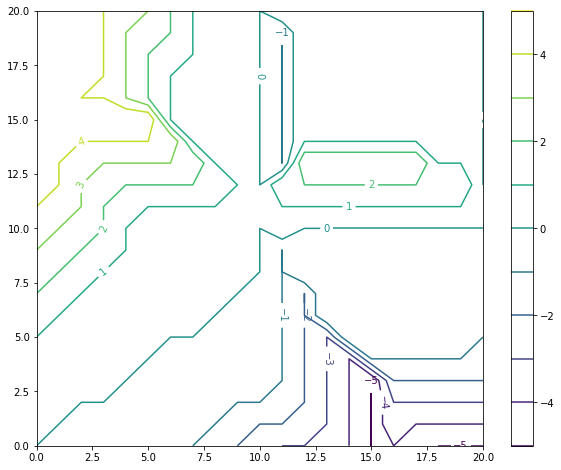

In [30]:
plt.figure(figsize=(10,8))
contours = plt.contour(action_matrix, levels=environment.action_space)
plt.clabel(contours, inline=True, fontsize=10)
plt.colorbar()

In [28]:
{agent.environment.state_space[state_idx]:agent.environment.action_space[act_idx] for state_idx, act_idx in enumerate(agent.policy)}

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 0,
 (0, 3): 0,
 (0, 4): 0,
 (0, 5): 0,
 (0, 6): 0,
 (0, 7): -1,
 (0, 8): -1,
 (0, 9): -2,
 (0, 10): -2,
 (0, 11): -3,
 (0, 12): -3,
 (0, 13): -3,
 (0, 14): -4,
 (0, 15): -5,
 (0, 16): -4,
 (0, 17): -4,
 (0, 18): -5,
 (0, 19): -5,
 (0, 20): -5,
 (1, 0): 1,
 (1, 1): 0,
 (1, 2): 0,
 (1, 3): 0,
 (1, 4): 0,
 (1, 5): 0,
 (1, 6): 0,
 (1, 7): 0,
 (1, 8): -1,
 (1, 9): -1,
 (1, 10): -2,
 (1, 11): -2,
 (1, 12): -2,
 (1, 13): -3,
 (1, 14): -4,
 (1, 15): -5,
 (1, 16): -3,
 (1, 17): -4,
 (1, 18): -4,
 (1, 19): -4,
 (1, 20): -4,
 (2, 0): 1,
 (2, 1): 1,
 (2, 2): 0,
 (2, 3): 0,
 (2, 4): 0,
 (2, 5): 0,
 (2, 6): 0,
 (2, 7): 0,
 (2, 8): 0,
 (2, 9): -1,
 (2, 10): -1,
 (2, 11): -1,
 (2, 12): -2,
 (2, 13): -3,
 (2, 14): -4,
 (2, 15): -5,
 (2, 16): -3,
 (2, 17): -3,
 (2, 18): -3,
 (2, 19): -3,
 (2, 20): -3,
 (3, 0): 1,
 (3, 1): 1,
 (3, 2): 1,
 (3, 3): 1,
 (3, 4): 0,
 (3, 5): 0,
 (3, 6): 0,
 (3, 7): 0,
 (3, 8): 0,
 (3, 9): 0,
 (3, 10): 0,
 (3, 11): -1,
 (3, 12): -2,
 (3, 13): -

In [29]:
agent.state_values

array([429.92666119, 439.8953468 , 449.73270077, 459.28838177,
       468.42672738, 477.07495794, 485.22333114, 493.10776614,
       500.77473344, 508.26564956, 515.45669329, 522.24363184,
       528.92427937, 535.15444607, 540.8922619 , 545.79959808,
       547.572561  , 552.16792021, 556.37098495, 560.28393827,
       563.84234422, 439.8953468 , 449.79235773, 459.62925097,
       469.18367858, 478.31963101, 486.96421209, 495.10776614,
       502.77473344, 510.26564956, 517.45669329, 524.24363184,
       530.92427937, 537.15444607, 542.8922619 , 547.79959808,
       551.9915349 , 554.16792021, 558.37098495, 562.28393827,
       565.84234422, 569.1193182 , 449.79235773, 459.62925097,
       469.19451487, 478.74381424, 487.86993971, 496.49946555,
       504.62305327, 512.26564956, 519.45669329, 526.24363184,
       532.92427937, 539.15444607, 544.8922619 , 549.79959808,
       553.9915349 , 557.56542606, 560.37098495, 564.28393827,
       567.84234422, 571.1193182 , 574.16214085, 459.35